In [3]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [4]:
class Point:
    def __init__(self, x, y, color=[255,255,255]):
        self.x = x
        self.y = y
        self.color = color

class Canvas:
    def __init__(self,
                 width=600, 
                 height=600):
        self.width = width
        self.height = height
        
        self.img = np.zeros((width,height,3), dtype = np.uint8) + 255
        
    def put_pixel(self, x, y, color,line_width):
        x = self.width/2 + x
        y = self.height/2 - y -1
        if (x< 0 or x >= self.width or y < 0 or y >= self.height):
            return 
        R = int(color[0])
        G = int(color[1])
        B = int(color[2])
        cv2.line(self.img, (int(x), int(y)), (int(x), int(y)), (R,G,B),line_width)
        
    def draw_line(self, p0, p1, color, line_width):
        if np.abs(p0.x - p1.x) > abs(p0.y - p1.y):
            # line is horizontal-ish
            if p0.x > p1.x:
                p0, p1 = p1, p0
            
            ys = self.interpolate(p0.x,p0.y,p1.x,p1.y)

            for i in range(p1.x-p0.x+1):
                self.put_pixel(i+p0.x,ys[i],color,line_width)
                    
        else:
            # line is vertical-ish
                        # line is horizontal-ish
            if p0.y > p1.y:
                p0, p1 = p1, p0
            
            xs = self.interpolate(p0.y,p0.x,p1.y,p1.x)
            for i in range(p1.y-p0.y+1):
                self.put_pixel(xs[i], i+p0.y, color, line_width)
                
    
    def interpolate(self, i0, d0,i1, d1):
        if i0==i1:
            return [d0]
        else:
            values = []
            
            a = (d1-d0) / (i1 - i0)
            d = d0
            
            for i in range(i1 - i0+1):
                values.append(d)
                d += a
            return values

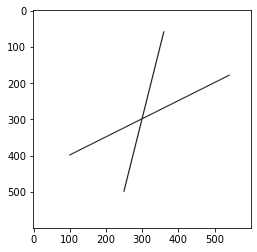

In [5]:
canvas = Canvas(600,600)

point1 = Point(-200,-100)
point2 = Point(240,120)
point3 = Point(-50,-200)
point4 = Point(60,240)

canvas.draw_line(point1, point2, (0,0,0),2)
canvas.draw_line(point3, point4, (0,0,0),2)

plt.imshow(canvas.img)